In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# The highest score for this hackaton was a Root mean squared error of 2339.60

# Importing and evaluating the training data with pandas

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [3]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


# Feature Engineering

In [4]:
count = dict(train.groupby('Store_ID')['Item_ID'].count())
count2 = dict(test.groupby('Store_ID')['Item_ID'].count())
count, count2

({'BABATUNJI010': 384,
  'BABATUNJI013': 594,
  'BABATUNJI017': 583,
  'BABATUNJI018': 500,
  'BABATUNJI019': 340,
  'BABATUNJI027': 462,
  'BABATUNJI035': 515,
  'BABATUNJI045': 483,
  'BABATUNJI046': 509,
  'BABATUNJI049': 620},
 {'BABATUNJI010': 170,
  'BABATUNJI013': 338,
  'BABATUNJI017': 343,
  'BABATUNJI018': 428,
  'BABATUNJI019': 188,
  'BABATUNJI027': 473,
  'BABATUNJI035': 415,
  'BABATUNJI045': 446,
  'BABATUNJI046': 421,
  'BABATUNJI049': 310})

In [5]:
train['Total_Item_In_Store'] = train['Store_ID'].apply(lambda x: count[x])
test['Total_Item_In_Store'] = train['Store_ID'].apply(lambda x: count2[x])

In [6]:
train.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Total_Item_In_Store
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,384
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,594
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,583
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,500
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,515


In [7]:
test.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Total_Item_In_Store
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store,170
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1,338
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1,343
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store,428
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1,415


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 14 columns):
Item_ID                4990 non-null object
Store_ID               4990 non-null object
Item_Store_ID          4990 non-null object
Item_Weight            4188 non-null float64
Item_Sugar_Content     4990 non-null object
Item_Visibility        4990 non-null float64
Item_Type              4990 non-null object
Item_Price             4990 non-null float64
Store_Start_Year       4990 non-null int64
Store_Size             3540 non-null object
Store_Location_Type    4990 non-null object
Store_Type             4990 non-null object
Item_Store_Returns     4990 non-null float64
Total_Item_In_Store    4990 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 545.9+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 13 columns):
Item_ID                3532 non-null object
Store_ID               3532 non-null object
Item_Store_ID          3532 non-null object
Item_Weight            2871 non-null float64
Item_Sugar_Content     3532 non-null object
Item_Visibility        3532 non-null float64
Item_Type              3532 non-null object
Item_Price             3532 non-null float64
Store_Start_Year       3532 non-null int64
Store_Size             2573 non-null object
Store_Location_Type    3532 non-null object
Store_Type             3532 non-null object
Total_Item_In_Store    3532 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 358.8+ KB


In [10]:
train.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns', 'Total_Item_In_Store'],
      dtype='object')

In [11]:
train.set_index('Item_Store_ID', inplace=True)
test.set_index('Item_Store_ID', inplace=True)

# Exploratory Data Analysis

In [21]:
### Comparism trackers, the deciding factor of what store size the missing value belonged to was the item_store_returns values of the missing stores
'''stores_items = {'BABATUNJI010': 384,
 'BABATUNJI013': 594,
 'BABATUNJI017': 583,
 'BABATUNJI018': 500,
 'BABATUNJI019': 340,
 'BABATUNJI027': 462,
 'BABATUNJI035': 515,
 'BABATUNJI045': 483,
 'BABATUNJI046': 509,
 'BABATUNJI049': 620}
stores_tw = {'BABATUNJI010': 4945.965000000001,
 'BABATUNJI013': 7609.240000000022,
 'BABATUNJI017': 7535.45500000001,
 'BABATUNJI018': 6494.185000000012,
 'BABATUNJI019': 0.0,
 'BABATUNJI027': 0.0,
 'BABATUNJI035': 6729.23000000001,
 'BABATUNJI045': 6129.155000000006,
 'BABATUNJI046': 6597.860000000011,
 'BABATUNJI049': 8021.1250000000155}
stores_size = {'BABATUNJI010': array([nan], dtype=object),
 'BABATUNJI013': array(['High'], dtype=object),
 'BABATUNJI017': array([nan], dtype=object),
 'BABATUNJI018': array(['Medium'], dtype=object),
 'BABATUNJI019': array(['Small'], dtype=object),
 'BABATUNJI027': array(['Medium'], dtype=object),
 'BABATUNJI035': array(['Small'], dtype=object),
 'BABATUNJI045': array([nan], dtype=object),
 'BABATUNJI046': array(['Small'], dtype=object),
 'BABATUNJI049': array(['Medium'], dtype=object)}'''


"stores_items = {'BABATUNJI010': 384,\n 'BABATUNJI013': 594,\n 'BABATUNJI017': 583,\n 'BABATUNJI018': 500,\n 'BABATUNJI019': 340,\n 'BABATUNJI027': 462,\n 'BABATUNJI035': 515,\n 'BABATUNJI045': 483,\n 'BABATUNJI046': 509,\n 'BABATUNJI049': 620}\nstores_tw = {'BABATUNJI010': 4945.965000000001,\n 'BABATUNJI013': 7609.240000000022,\n 'BABATUNJI017': 7535.45500000001,\n 'BABATUNJI018': 6494.185000000012,\n 'BABATUNJI019': 0.0,\n 'BABATUNJI027': 0.0,\n 'BABATUNJI035': 6729.23000000001,\n 'BABATUNJI045': 6129.155000000006,\n 'BABATUNJI046': 6597.860000000011,\n 'BABATUNJI049': 8021.1250000000155}\nstores_size = {'BABATUNJI010': array([nan], dtype=object),\n 'BABATUNJI013': array(['High'], dtype=object),\n 'BABATUNJI017': array([nan], dtype=object),\n 'BABATUNJI018': array(['Medium'], dtype=object),\n 'BABATUNJI019': array(['Small'], dtype=object),\n 'BABATUNJI027': array(['Medium'], dtype=object),\n 'BABATUNJI035': array(['Small'], dtype=object),\n 'BABATUNJI045': array([nan], dtype=object),

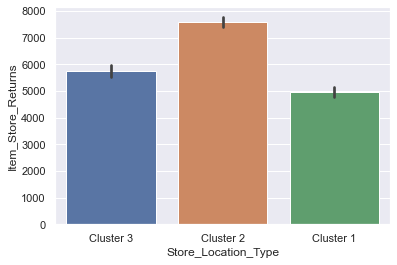

In [22]:
# Relationship between market clusters and item store returns

sns.barplot(x='Store_Location_Type', y='Item_Store_Returns', data=train)

## Cluster 2 has the highest return, followed by cluster 3 and then cluster 1 (stores based on the location). means cluster 2 is the best location for opening a new stores followed by 3 and 1

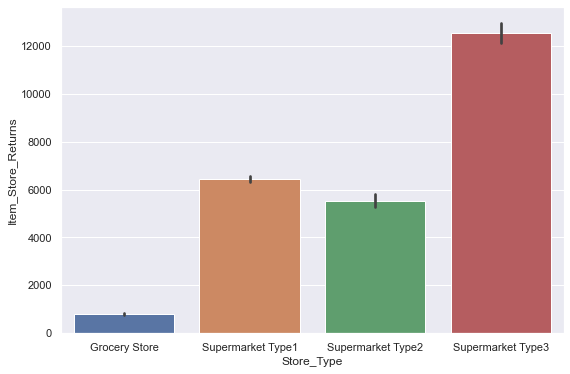

In [23]:
# Relationship between store type and item store returns
plt.figure(figsize=(9,6))
sns.barplot(x='Store_Type', y='Item_Store_Returns', data=train)

## The supermarket type three shows the highest return and emergest as the best store type for the new store as it has the best returns

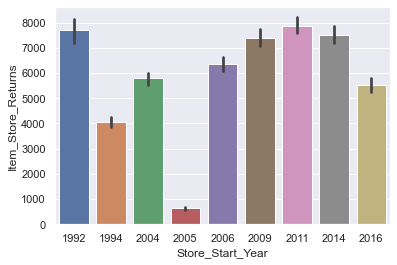

In [24]:
sns.barplot(x='Store_Start_Year', y='Item_Store_Returns', data=train)

## the year the store start give no clear indications for returns in accending or decending order 

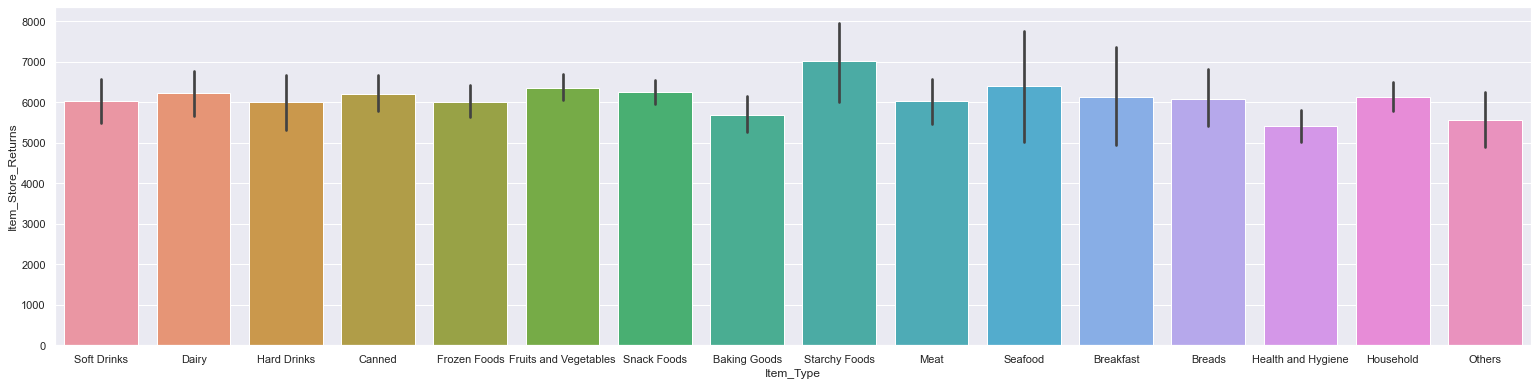

In [25]:
# relationship between the item type and the item store returns
plt.figure(figsize=(22,6))
sns.barplot(x='Item_Type', y='Item_Store_Returns', data=train)
plt.tight_layout(pad=3.0)

## Starchy foods shows the best best return

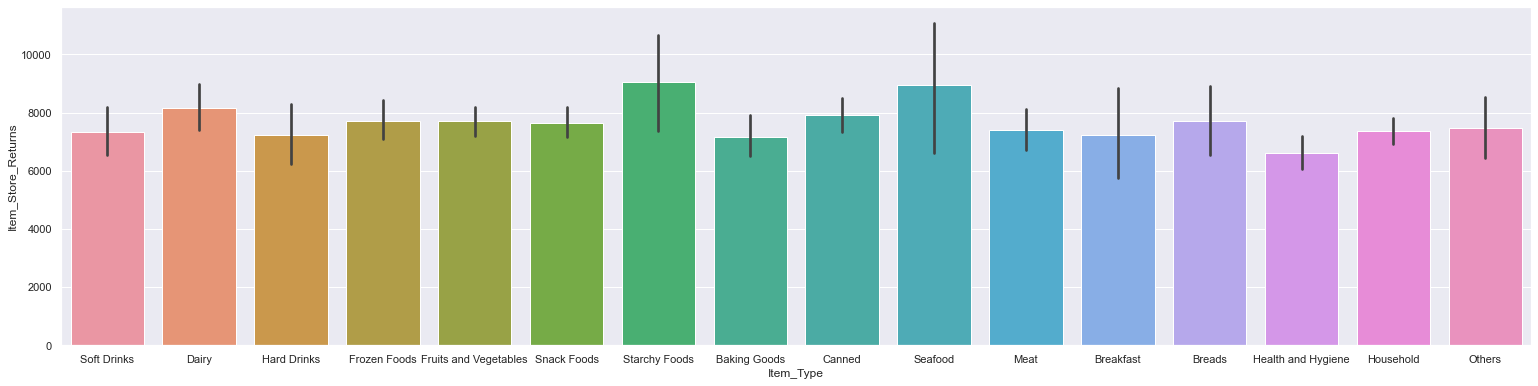

In [26]:
# best Item type in the best cluster location

cast = train[train['Store_Location_Type']=='Cluster 2']
plt.figure(figsize=(22,6))
sns.barplot(x='Item_Type', y='Item_Store_Returns', data=cast)
plt.tight_layout(pad=3.0)

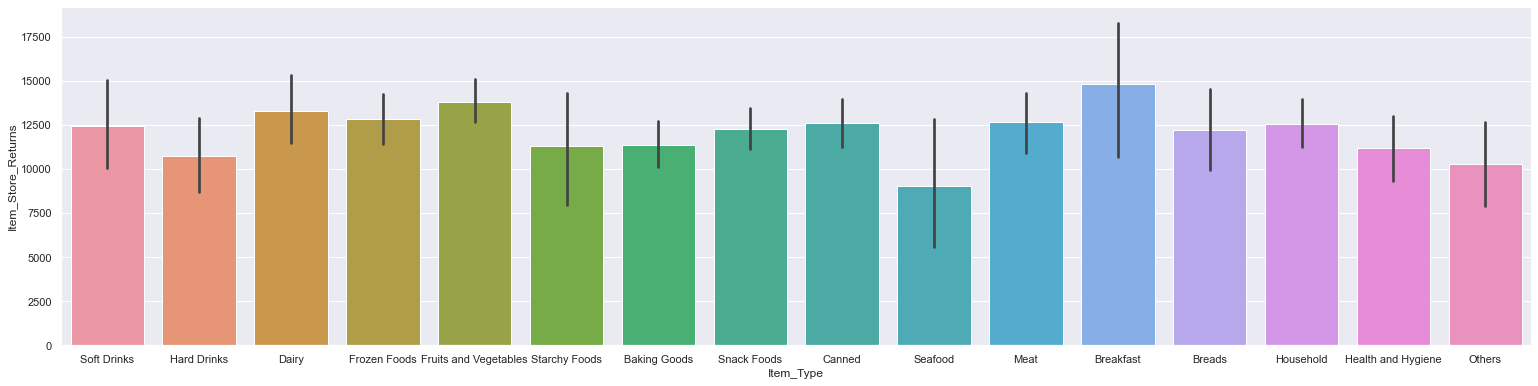

In [27]:
cast2 = train[train['Store_Type']=='Supermarket Type3']
plt.figure(figsize=(22,6))
sns.barplot(x='Item_Type', y='Item_Store_Returns', data=cast2)
plt.tight_layout(pad=3.0)

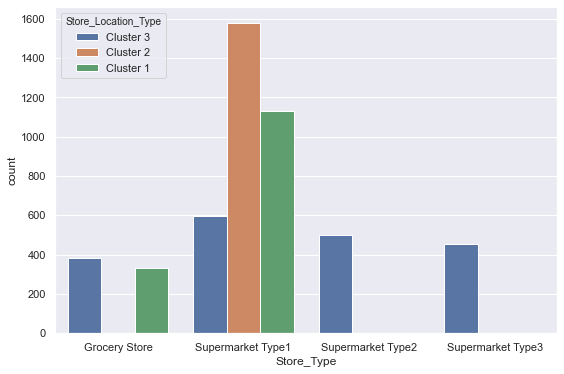

In [28]:
plt.figure(figsize=(9,6))
sns.countplot('Store_Type', data=train, hue='Store_Location_Type')

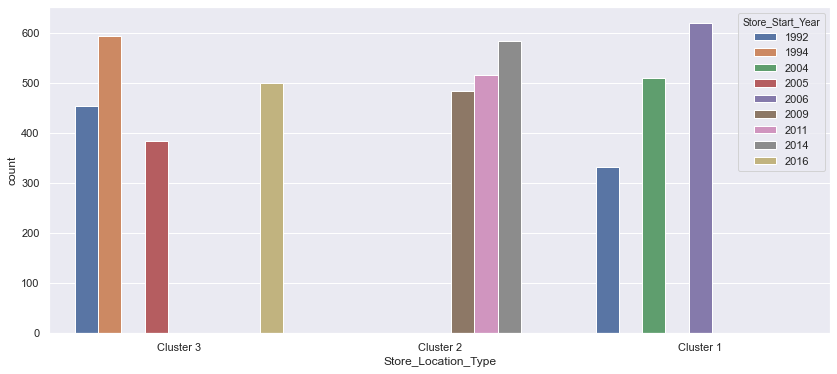

In [29]:
plt.figure(figsize=(14,6))
sns.countplot('Store_Location_Type', data=train, hue='Store_Start_Year')

## More Exploratory Data Analysis

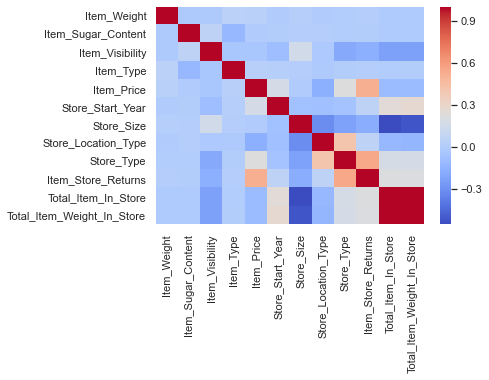

In [42]:
sns.heatmap(train.corr(), cmap='coolwarm')

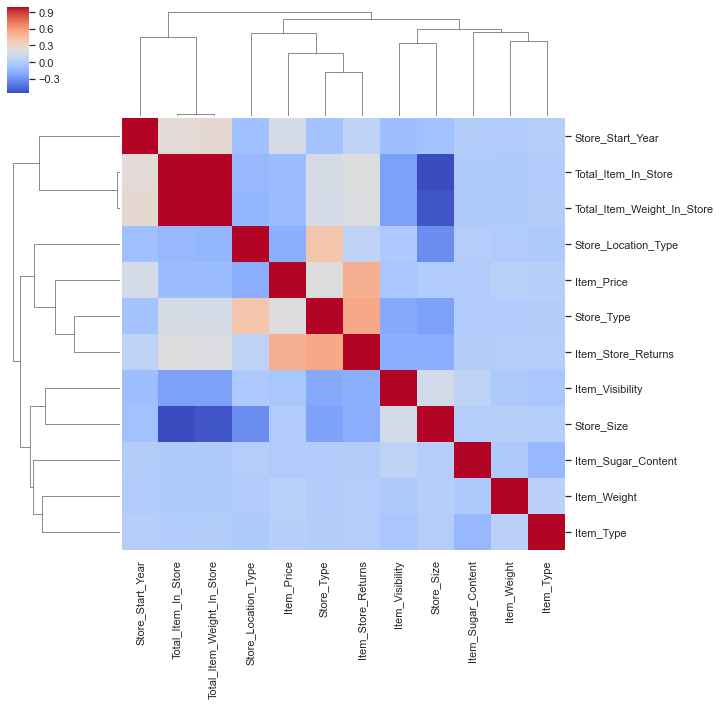

In [43]:
sns.clustermap(train.corr(), cmap='coolwarm')

# Splting the data and Training our models

# Models

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.linear_model import ElasticNet

elmodel = ElasticNet(alpha=0.0009, l1_ratio=0.9, max_iter=10000)

elmodel.fit(a_train, b_train)

elpred = elmodel.predict(a_test)


print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(elpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(elpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(elpred))))
print('R Squared: ', r2_score(b_test, np.exp(elpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(elpred))))

Mean absolute Error:  2425.552920399486
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3356.5363312444883
R Squared:  0.43369647048210747
RMSLE Score:  0.5812252778879541


In [93]:
from sklearn.ensemble import GradientBoostingRegressor
{'ls', 'lad', 'huber', 'quantile'},
gbmodel = GradientBoostingRegressor(loss='lad', alpha=0.9, learning_rate=0.07, max_depth=2)
gbmodel.fit(a_train, b_train)

pred = gbmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(pred+0.1)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(pred+0.1))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(pred+0.1))))
print('R Squared: ', r2_score(b_test, np.exp(pred+0.1)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(pred+0.1))))

Mean absolute Error:  2126.1017759400015
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  2879.3752584367962
R Squared:  0.5832620022183899
RMSLE Score:  0.5348563830741047


In [49]:
pd.DataFrame({'columns': x.columns, 'feature importance': gbmodel.feature_importances_})

,columns,feature importance
0,Item_Weight,0.002887
1,Item_Sugar_Content,0.000625
2,Item_Visibility,0.008282
3,Item_Type,0.000831
4,Item_Price,0.400531
5,Store_Start_Year,0.008058
6,Store_Size,0.000000
7,Store_Location_Type,0.000136
8,Store_Type,0.193932
9,Total_Item_In_Store,0.183917


In [50]:
#from sklearn.model_selection import GridSearchCV

#params = {'loss': ('ls', 'lad', 'huber', 'quantile'),
         #'max_depth': (2,4,6,8,10),
         #'alpha': (0.1, 0.5, 0.7, 0.9)}
#grid = GridSearchCV(GradientBoostingRegressor(learning_rate=0.07), params, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=10)
#grid.fit(a_train, b_train)

In [51]:
#grid.best_estimator_

In [90]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=2000, bootstrap=True,max_depth=3000, max_features=9, min_samples_leaf=30, min_samples_split=50, n_jobs=-1, random_state=42)
model.fit(a_train, b_train)

pred = model.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(pred+0.2)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(pred+0.2))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(pred+0.2))))
print('R Squared: ', r2_score(b_test, np.exp(pred+0.2)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(pred+0.2))))

Mean absolute Error:  2190.6680326805167
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  2984.166534077944
R Squared:  0.5523767099280202
RMSLE Score:  0.5499987421984464


In [53]:
model.feature_importances_
x.columns

pd.DataFrame({'columns': x.columns, 'feature importance': model.feature_importances_})

,columns,feature importance
0,Item_Weight,0.056144
1,Item_Sugar_Content,0.009153
2,Item_Visibility,0.064489
3,Item_Type,0.031499
4,Item_Price,0.233040
5,Store_Start_Year,0.012714
6,Store_Size,0.004213
7,Store_Location_Type,0.003630
8,Store_Type,0.189700
9,Total_Item_In_Store,0.190722


In [54]:
from sklearn.linear_model import Lasso

rdmodel = Lasso(max_iter=10000, alpha=0.007)

rdmodel.fit(a_train, b_train)

rdpred = rdmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(rdpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(rdpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(rdpred))))
print('R Squared: ', r2_score(b_test, np.exp(rdpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(rdpred))))

Mean absolute Error:  2424.343477470498
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3350.6712723983555
R Squared:  0.4356738074528501
RMSLE Score:  0.5814741006359169


In [55]:
from sklearn.linear_model import Ridge
solver = {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}

gmodel = Ridge(solver='lsqr', alpha=2)

gmodel.fit(a_train, b_train)

gpred = gmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(gpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(gpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(gpred))))
print('R Squared: ', r2_score(b_test, np.exp(gpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(gpred))))

Mean absolute Error:  2426.6773885980556
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3358.079593968584
R Squared:  0.4331756025669812
RMSLE Score:  0.5816080747270107


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knnmodel = KNeighborsRegressor(n_neighbors=9, n_jobs=-1)
knnmodel.fit(a_train, b_train)

kpred = knnmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(kpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(kpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(kpred))))
print('R Squared: ', r2_score(b_test, np.exp(kpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(kpred))))

Mean absolute Error:  2277.080838021079
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3129.498678417982
R Squared:  0.5077155603077161
RMSLE Score:  0.5486770403360921


In [57]:
from sklearn.linear_model import LinearRegression

lmodel = LinearRegression(n_jobs=-1)

lmodel.fit(a_train, b_train)

lpred = lmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(lpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(lpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(lpred))))
print('R Squared: ', r2_score(b_test, np.exp(lpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(lpred))))

Mean absolute Error:  2411.8796599314255
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3339.5602659464444
R Squared:  0.4394102741151813
RMSLE Score:  0.5769208766429595


In [58]:
from sklearn.svm import SVR

vmodel = SVR(kernel='linear', C=0.001)

vmodel.fit(a_train, b_train)

vpred = vmodel.predict(a_test)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(vpred)))
print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(vpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(vpred))))
print('R Squared: ', r2_score(b_test, np.exp(vpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(vpred))))

Mean absolute Error:  2414.472327277849
Residual Sum of Squares (RSS):  58418338152.474396
Root Mean Squared Error:  3299.260756666445
R Squared:  0.4528582611611309
RMSLE Score:  0.5952844867731705


# Deep Neural Network

In [59]:
import tensorflow as tf

In [60]:
# Check that i am using the Gpu version of tensorflow for faster computation
from tensorflow.python.client import device_lib 

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9172042257978007499
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1416432436
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15031753174883743174
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [61]:
from tensorflow.keras import backend

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


In [62]:
train.head()

,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Total_Item_In_Store,Total_Item_Weight_In_Store
Item_Store_ID,,,,,,,,,,,,
DRA12_BABATUNJI010,11.6,0,0.068535,14,357.54,2005,2,2,0,709.08,384,4945.965
DRA12_BABATUNJI013,11.6,0,0.040912,14,355.79,1994,0,2,1,6381.69,594,7609.240
DRA12_BABATUNJI017,11.6,0,0.041178,14,350.79,2014,0,1,1,6381.69,583,7535.455
DRA12_BABATUNJI018,11.6,0,0.041113,14,355.04,2016,1,2,2,2127.23,500,6494.185
DRA12_BABATUNJI035,11.6,2,0.000000,14,354.79,2011,2,1,1,2481.77,515,6729.230


In [63]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout


deep = keras.Sequential()

deep.add(keras.layers.Conv2D(60, input_dim=11, activation='relu'))
deep.add(Dropout(0.2))
deep.add(keras.layers.BatchNormalization(momentum=0.99, epsilon=0.0001))

deep.add(Dense(60, activation='relu'))
deep.add(Dropout(0.2))
deep.add(keras.layers.BatchNormalization(momentum=0.99, epsilon=0.0001))

deep.add(Dense(60, activation='relu'))
deep.add(Dropout(0.2))
deep.add(keras.layers.BatchNormalization(momentum=0.99, epsilon=0.0001))

deep.add(Dense(60, activation='relu'))
deep.add(Dropout(0.2))
deep.add(keras.layers.BatchNormalization(momentum=0.99, epsilon=0.0001))

deep.add(Dense(1))

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [ ]:
deep.compile(optimizer=keras.optimizers.Adam(learning_rate=0.020213841),
             loss=rmse, metrics=['mae', 'msle'])

In [ ]:
deep.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

training = deep.fit(a_train, np.exp(b_train), epochs=200, validation_split=0.2, batch_size=32, callbacks=[early_stop])

In [ ]:
dpred = deep.predict(a_test)
dpred = np.log(dpred)

print('Mean absolute Error: ', mean_absolute_error(b_test, np.exp(dpred)))
#print('Residual Sum of Squares (RSS): ',  np.sum(np.square(b_test, np.exp(dpred))))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(b_test, np.exp(dpred))))
print('R Squared: ', r2_score(b_test, np.exp(dpred)))
print('RMSLE Score: ', np.sqrt(mean_squared_log_error(b_test, np.exp(dpred))))

# I choose the Gradient Boosting Regressor model

# Prediction

In [ ]:
test.head()

In [ ]:
test.info()

In [ ]:
# fixing categorical columns

from sklearn.preprocessing import LabelEncoder

catt = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

for y in catt:
    test[y] = LabelEncoder().fit_transform(test[y])

print(test.info())

In [ ]:
# fixing the missing values in with Random Forest regressor

k_test = test[test['Item_Weight'].isna()].drop(['Item_Weight', 'Item_ID', 'Store_ID'], axis=1)
k_train = test[test['Item_Weight'].isna() == False].drop(['Item_Weight', 'Item_ID', 'Store_ID'], axis=1)
l_train = test[test['Item_Weight'].isna()==False]['Item_Weight']

print(k_train.shape, k_test.shape)
print(l_train.shape)

rff = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
rff.fit(k_train, l_train)
xenon = rff.predict(k_test)
xenon

In [ ]:
bless = list(test[test['Item_Weight'].isna()]['Item_ID'])

chef = {bless[x]:xenon[x] for x in range(len(bless))}

In [ ]:
len(chef)

In [ ]:
def tripping(row):
    kia = row[0]
    dump = row[2]
    
    if kia in bless:
        print(kia)
        dump = chef[kia]
    return dump

test['Item_Weight'] = test.apply(tripping, axis=1)

In [ ]:
#dropping the item and stor Id columns
idd = test['Item_ID'].copy()
test.drop(['Item_ID', 'Store_ID'], axis=1, inplace=True)

In [ ]:
test.info()

In [ ]:
sns.heatmap(test.corr(), cmap='coolwarm')

In [ ]:
# The prediction
# Using our random forest model to make the prediction
# first we need to scale our test data
check = test.drop(['Store_Size', 'Item_Sugar_Content', 'Store_Location_Type'], axis=1).copy()
check = StandardScaler().fit_transform(check)

#from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)
#model.fit(a_train, b_train)

test_pred = gbmodel.predict(check)

# coverting to real values using np.exp function
test_result = np.exp(test_pred)
test_result

In [ ]:
result = pd.DataFrame({'Item_Store_Returns': test_result, 'Item_ID': idd}).reset_index()
result.info(())

In [ ]:
result.drop('Item_ID', axis=1, inplace=True)

In [ ]:
result

In [ ]:
submit = pd.read_csv('SampleSubmission.csv')
submit.drop('Item_Store_Returns', axis=1, inplace=True)
submit.info()

In [ ]:
submission = submit.merge(result, on='Item_Store_ID')
submission.head()

In [ ]:
submission.to_csv('Submission6.csv', index=False)

# NEW TRY

# Retry

In [200]:
train2 = pd.read_csv('train.csv')
test2 = pd.read_csv('test.csv')

In [201]:
train2.isna().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [202]:
test2.isna().sum()

Item_ID                  0
Store_ID                 0
Item_Store_ID            0
Item_Weight            661
Item_Sugar_Content       0
Item_Visibility          0
Item_Type                0
Item_Price               0
Store_Start_Year         0
Store_Size             959
Store_Location_Type      0
Store_Type               0
dtype: int64

In [203]:
train2.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [204]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Item_ID                4990 non-null object
Store_ID               4990 non-null object
Item_Store_ID          4990 non-null object
Item_Weight            4188 non-null float64
Item_Sugar_Content     4990 non-null object
Item_Visibility        4990 non-null float64
Item_Type              4990 non-null object
Item_Price             4990 non-null float64
Store_Start_Year       4990 non-null int64
Store_Size             3540 non-null object
Store_Location_Type    4990 non-null object
Store_Type             4990 non-null object
Item_Store_Returns     4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [205]:
train2['PV'] = train2['Item_Price'] * train2['Item_Visibility']
test2['PV'] = test2['Item_Price'] * test2['Item_Visibility']


In [206]:
train2.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,PV
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,24.504018
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,14.556018
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,14.444657
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,14.596651
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,0.000000


# FIxing the missing categorical variables

In [207]:
train2[train2['Store_Size'].isna()]['Store_ID'].unique()

array(['BABATUNJI010', 'BABATUNJI017', 'BABATUNJI045'], dtype=object)

In [208]:
train2[train2['Item_Weight'].isna()]['Store_ID'].unique()

array(['BABATUNJI019', 'BABATUNJI027'], dtype=object)

In [209]:
train2.groupby('Store_ID')['Item_Store_Returns'].sum()

Store_ID
BABATUNJI010     240638.60
BABATUNJI013    2407829.22
BABATUNJI017    4370201.60
BABATUNJI018    2770310.84
BABATUNJI019     357844.32
BABATUNJI027    5803269.64
BABATUNJI035    4058828.52
BABATUNJI045    3567311.83
BABATUNJI046    2945704.10
BABATUNJI049    3934626.95
Name: Item_Store_Returns, dtype: float64

In [210]:
train2.groupby('Store_ID')['Store_Type'].unique()

Store_ID
BABATUNJI010        [Grocery Store]
BABATUNJI013    [Supermarket Type1]
BABATUNJI017    [Supermarket Type1]
BABATUNJI018    [Supermarket Type2]
BABATUNJI019        [Grocery Store]
BABATUNJI027    [Supermarket Type3]
BABATUNJI035    [Supermarket Type1]
BABATUNJI045    [Supermarket Type1]
BABATUNJI046    [Supermarket Type1]
BABATUNJI049    [Supermarket Type1]
Name: Store_Type, dtype: object

In [211]:
train2.groupby('Store_ID')['Store_Size'].unique()

Store_ID
BABATUNJI010       [nan]
BABATUNJI013      [High]
BABATUNJI017       [nan]
BABATUNJI018    [Medium]
BABATUNJI019     [Small]
BABATUNJI027    [Medium]
BABATUNJI035     [Small]
BABATUNJI045       [nan]
BABATUNJI046     [Small]
BABATUNJI049    [Medium]
Name: Store_Size, dtype: object

In [212]:
train2.groupby('Store_ID')['Item_Type'].count()

Store_ID
BABATUNJI010    384
BABATUNJI013    594
BABATUNJI017    583
BABATUNJI018    500
BABATUNJI019    340
BABATUNJI027    462
BABATUNJI035    515
BABATUNJI045    483
BABATUNJI046    509
BABATUNJI049    620
Name: Item_Type, dtype: int64

In [213]:
train2.groupby('Item_Type')['Item_Weight'].sum()

Item_Type
Baking Goods             3634.445
Breads                   1247.515
Breakfast                 693.330
Canned                   3895.650
Dairy                    3956.130
Frozen Foods             5107.305
Fruits and Vegetables    8112.950
Hard Drinks              1313.380
Health and Hygiene       3545.230
Household                6208.600
Meat                     2742.460
Others                   1194.625
Seafood                   364.820
Snack Foods              8454.570
Soft Drinks              2639.265
Starchy Foods             951.940
Name: Item_Weight, dtype: float64

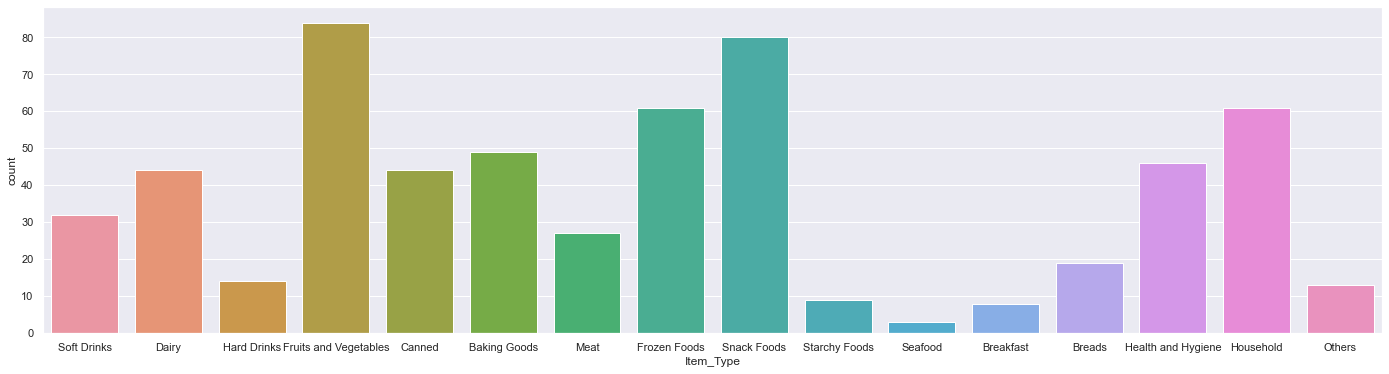

In [214]:
plt.figure(figsize=(24,6))
sns.countplot(train2[train2['Store_ID']=='BABATUNJI013']['Item_Type'])

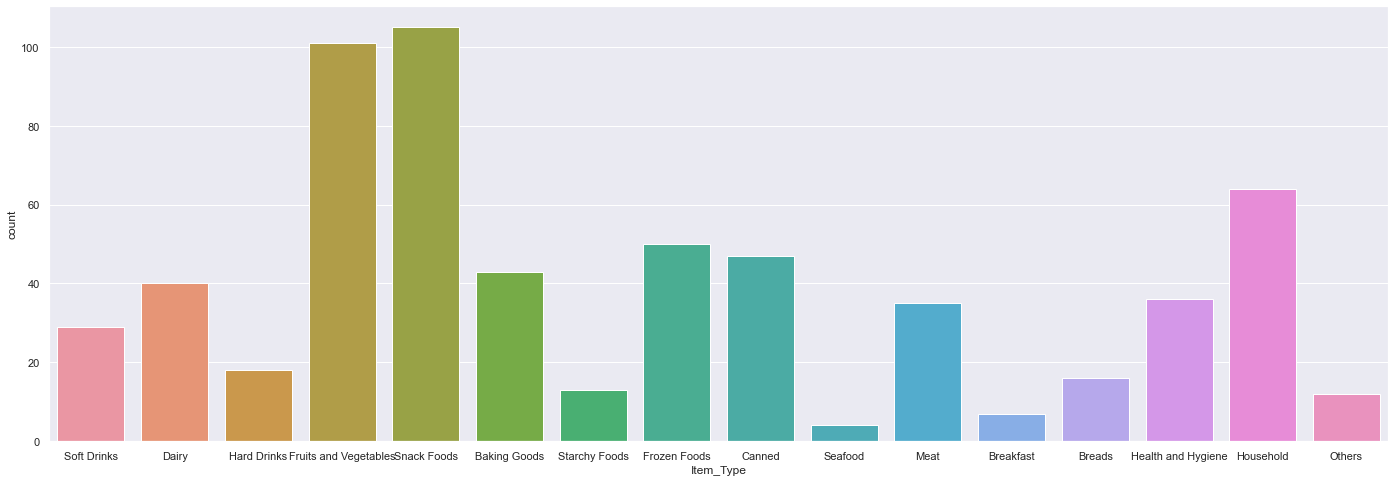

In [215]:
plt.figure(figsize=(24,8))
sns.countplot(train2[train2['Store_ID']=='BABATUNJI049']['Item_Type'])

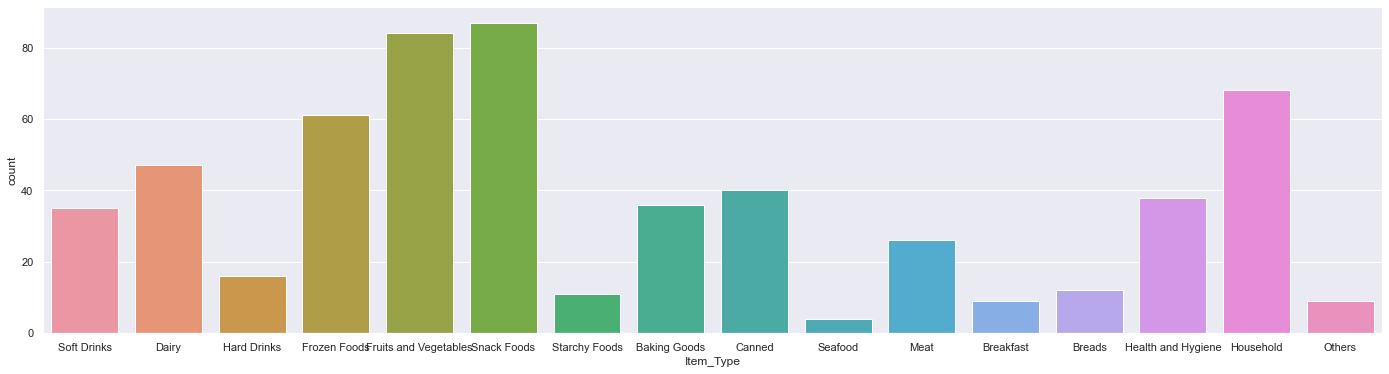

In [216]:
plt.figure(figsize=(24,6))
sns.countplot(train2[train2['Store_ID']=='BABATUNJI017']['Item_Type'])

# Weight

In [217]:
unk = list(train2[train2['Item_Weight'].isna()]['Item_ID'].unique())
unkt = list(test2[test2['Item_Weight'].isna()]['Item_ID'].unique())

unk_dict = {}
for x in range(len(unk)):
    values = list(train2[train2['Item_ID']==unk[x]]['Item_Weight'].unique())
    if len(values) < 2:
        unk_dict[unk[x]] = values[0]
    for y in values:
        if not np.isnan(y):
            unk_dict[unk[x]] = y

# test
unkt_dict = {}
for x in range(len(unkt)):
    values = list(test2[test2['Item_ID']==unkt[x]]['Item_Weight'].unique())
    if len(values) < 2:
        unkt_dict[unkt[x]] = values[0]
    for y in values:
        if not np.isnan(y):
            unkt_dict[unkt[x]] = y
            

def fix(row):
    ID = row[0]
    weight = row[3]
    
    if ID in unk:
        weight = unk_dict[ID]
    return weight
    
train2['Item_Weight'] = train2.apply(fix, axis=1,)


#test
def fixt(row):
    IDt = row[0]
    weightt = row[3]
    
    if IDt in unkt:
        weightt = unkt_dict[IDt]
    return weightt
    
test2['Item_Weight'] = test2.apply(fixt, axis=1,)

In [218]:
train2.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,PV
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,24.504018
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,14.556018
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,14.444657
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,14.596651
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,0.000000


# Size

In [219]:
stores_na = ['BABATUNJI010', 'BABATUNJI017', 'BABATUNJI045']
stores_dict = {'BABATUNJI010':'Small', 'BABATUNJI017':'High', 'BABATUNJI045':'Medium'}
def tfix(row):
    ID = row[1]
    stype = row[9]
    
    if ID in stores_na:
        stype = stores_dict[ID]
    return stype
    
train2['Store_Size'] = train2.apply(tfix, axis=1,)

# Test
storest_na = ['BABATUNJI010', 'BABATUNJI017', 'BABATUNJI045']
storest_dict = {'BABATUNJI010':'Small', 'BABATUNJI017':'High', 'BABATUNJI045':'Medium'}
def tfixt(row):
    IDt = row[1]
    stypet = row[9]
    
    if IDt in storest_na:
        stypet = storest_dict[IDt]
    return stypet
    
test2['Store_Size'] = test2.apply(tfixt, axis=1,)

In [220]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 14 columns):
Item_ID                4990 non-null object
Store_ID               4990 non-null object
Item_Store_ID          4990 non-null object
Item_Weight            4973 non-null float64
Item_Sugar_Content     4990 non-null object
Item_Visibility        4990 non-null float64
Item_Type              4990 non-null object
Item_Price             4990 non-null float64
Store_Start_Year       4990 non-null int64
Store_Size             4990 non-null object
Store_Location_Type    4990 non-null object
Store_Type             4990 non-null object
Item_Store_Returns     4990 non-null float64
PV                     4990 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 545.9+ KB


# Preparing the training data

In [221]:
train2.set_index(['Item_ID', 'Item_Store_ID'], inplace=True)
train2.drop('Store_Start_Year', axis=1, inplace=True)
test2.set_index(['Item_ID', 'Item_Store_ID'], inplace=True)
test2.drop('Store_Start_Year', axis=1, inplace=True)

In [222]:
# creating pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

X = train2.drop('Item_Store_Returns', axis=1)
y = train2['Item_Store_Returns']

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


In [223]:
cat = [
    'Store_ID', 'Item_Sugar_Content', 'Item_Type', 'Store_Size',
    'Store_Location_Type', 'Store_Type'
]

num = ['Item_Weight', 'Item_Visibility', 'Item_Price']

num_pipeline = Pipeline([('selector', DataFrameSelector(num)),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat)),
                         ('encoder', OneHotEncoder())])

full_pipeline = FeatureUnion([('num_pipeline', num_pipeline),
                              ('cat_pipeline', cat_pipeline)], n_jobs=-1)

In [224]:
X_prep = full_pipeline.fit_transform(X)

In [225]:
X = X_prep.toarray()

In [193]:
X

array([[-0.28486613,  0.03051274, -0.28704749, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28486613, -0.49015852, -0.30170824, ...,  1.        ,
         0.        ,  0.        ],
       [-0.28486613, -0.48515069, -0.34359611, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.36520168,  0.31312417,  0.12010262, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.36520168,  0.30993764,  0.10963065, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.36520168,  0.3123805 ,  0.09706429, ...,  1.        ,
         0.        ,  0.        ]])

# Finding the right model

In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

some_data = train2.drop('Item_Store_Returns', axis=1).iloc[:5]
some_data_prep = full_pipeline.transform(some_data)
some_label = y.iloc[:5]

print('1', model.predict(some_data_prep))
print('2', list(some_label))

1 [1528. 5592. 5744. 5104. 6024.]
2 [709.08, 6381.69, 6381.69, 2127.23, 2481.77]


In [39]:
from sklearn.metrics import mean_squared_error

predi = model.predict(X)

print(np.sqrt(mean_squared_error(y, predi)))

2981.0221398233384


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X, y)

predic = tree.predict(X)
print(np.sqrt(mean_squared_error(y, predic)))

0.0


## Crossvalidation

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, scoring='neg_mean_squared_error', cv=10)

rmse_scores = np.sqrt(-scores)

def display(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard deviation', scores.std())
    
display(rmse_scores)

Scores [4043.22685003 4552.96207268 4002.84724562 4442.35603257 3977.84072542
 4160.59649453 3928.62977467 4273.38668841 4070.85231249 3903.23268936]
Mean 4135.593088578187
Standard deviation 209.75412859167878


In [42]:
lscore = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

lrmse = np.sqrt(-lscore)

display(lrmse)

Scores [3084.44069459 2799.13321439 2977.70708137 3229.16657932 2979.16210156
 3065.99902841 3013.23091244 3021.17386369 2785.94529914 2772.27916185]
Mean 2972.8237936757982
Standard deviation 140.07005542103815


In [43]:
from sklearn.ensemble import RandomForestRegressor

rand = RandomForestRegressor()

rand.fit(X,y)

rscore = cross_val_score(rand, X, y, scoring='neg_mean_squared_error', cv=10)

rrmse = np.sqrt(-rscore)

display(rrmse)

Scores [3152.04628851 2961.37511062 2987.82366843 3371.43656028 3053.41004236
 3053.85597001 3034.95828367 3121.47488886 2875.01266197 2908.42874903]
Mean 3051.982222372933
Standard deviation 134.69976981672795


In [44]:
predicti = rand.predict(X)

print(np.sqrt(mean_squared_error(y, predicti)))

1144.931140693339


In [85]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(X,y)

gscore = cross_val_score(gb, X, y, scoring='neg_mean_squared_error', cv=10)

grmse = np.sqrt(-gscore)

display(grmse)

ValueError: could not convert string to float: 'BABATUNJI010'

In [46]:
predictio = gb.predict(X)

print(np.sqrt(mean_squared_error(y, predictio)))

2734.5501831761976


# GridSearchCV

In [46]:
# Grid search on random forest model

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    },
]

grid = GridSearchCV(forest, param_grid, scoring='neg_mean_squared_error')

grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [47]:
grid.best_params_

{'max_features': 6, 'n_estimators': 30}

In [48]:
grid.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [50]:
cvres = grid.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3579.670710781106 {'max_features': 2, 'n_estimators': 3}
3255.973325371998 {'max_features': 2, 'n_estimators': 10}
3139.5229829242 {'max_features': 2, 'n_estimators': 30}
3504.9476621163926 {'max_features': 4, 'n_estimators': 3}
3196.9754156476633 {'max_features': 4, 'n_estimators': 10}
3108.0968398359146 {'max_features': 4, 'n_estimators': 30}
3491.6174981637746 {'max_features': 6, 'n_estimators': 3}
3187.0871474485975 {'max_features': 6, 'n_estimators': 10}
3079.3193229885296 {'max_features': 6, 'n_estimators': 30}
3448.2370865905255 {'max_features': 8, 'n_estimators': 3}
3163.2114040286406 {'max_features': 8, 'n_estimators': 10}
3080.978952277678 {'max_features': 8, 'n_estimators': 30}
3645.9360294832736 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3334.93094395572 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3641.974611242623 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3349.9994316893194 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [54]:
imp = grid.best_estimator_.feature_importances_

on = OneHotEncoder()
on.fit(train2[cat])

cat_att = list(on.categories_)

att = num + cat_att

In [55]:
sorted(zip(imp, att), reverse=True)

[(0.24591654255191026, 'Item_Price'),
 (0.11057998470849208, 'Item_Weight'),
 (0.1093089846927224, 'Item_Visibility'),
 (0.05076190937543935, 'Store_Start_Year'),
 (0.0390188346804728,
  array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
         'Supermarket Type3'], dtype=object)),
 (0.027898784198945425,
  array(['Cluster 1', 'Cluster 2', 'Cluster 3'], dtype=object)),
 (0.016608790808061522,
  array(['BABATUNJI010', 'BABATUNJI013', 'BABATUNJI017', 'BABATUNJI018',
         'BABATUNJI019', 'BABATUNJI027', 'BABATUNJI035', 'BABATUNJI045',
         'BABATUNJI046', 'BABATUNJI049'], dtype=object)),
 (0.008031807470895934,
  array(['Low Sugar', 'Normal Sugar', 'Ultra Low Sugar'], dtype=object)),
 (0.00405753533672731, array(['High', 'Medium', 'Small'], dtype=object)),
 (0.003222894447449529,
  array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
         'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
         'Health and Hygiene', 'Household', 'Meat', 'Ot

# Splitting the data

In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([ 18.,  33.,  27.,  37.,  34.,  17.,  30.,  24.,  14.,   1.,   6.,
         20.,  21.,  33.,  38.,  67.,  77.,  79.,  93.,  97., 140., 128.,
        144., 153., 142.,  90.,   6.,  75., 216., 213., 201., 202., 177.,
        181., 155., 155., 175., 190., 167., 159., 159., 140., 128.,   5.,
         24.,  59.,  56.,  52.,  53.,  59.,  59.,  50.,  33.,  41.,  38.,
         44.,  54.,  50.,  37.,  14.]),
 array([ 78.73      ,  88.53816667,  98.34633333, 108.1545    ,
        117.96266667, 127.77083333, 137.579     , 147.38716667,
        157.19533333, 167.0035    , 176.81166667, 186.61983333,
        196.428     , 206.23616667, 216.04433333, 225.8525    ,
        235.66066667, 245.46883333, 255.277     , 265.08516667,
        274.89333333, 284.7015    , 294.50966667, 304.31783333,
        314.126     , 323.93416667, 333.74233333, 343.5505    ,
        353.35866667, 363.16683333, 372.975     , 382.78316667,
        392.59133333, 402.3995    , 412.20766667, 422.01583333,
        431.82

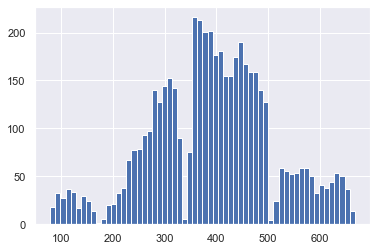

In [227]:
# we have discovered that the item price
plt.hist(train2['Item_Price'], bins=60)

In [228]:
train2.head(10)

Store_ID  Item_Weight Item_Sugar_Content  \
Item_ID Item_Store_ID                                                      
DRA12   DRA12_BABATUNJI010  BABATUNJI010        11.60          Low Sugar   
        DRA12_BABATUNJI013  BABATUNJI013        11.60          Low Sugar   
        DRA12_BABATUNJI017  BABATUNJI017        11.60          Low Sugar   
        DRA12_BABATUNJI018  BABATUNJI018        11.60          Low Sugar   
        DRA12_BABATUNJI035  BABATUNJI035        11.60    Ultra Low Sugar   
        DRA12_BABATUNJI045  BABATUNJI045        11.60          Low Sugar   
DRA24   DRA24_BABATUNJI010  BABATUNJI010        19.35       Normal Sugar   
        DRA24_BABATUNJI013  BABATUNJI013        19.35       Normal Sugar   
        DRA24_BABATUNJI017  BABATUNJI017        19.35       Normal Sugar   
        DRA24_BABATUNJI019  BABATUNJI019        19.35       Normal Sugar   

                            Item_Visibility    Item_Type  Item_Price  \
Item_ID Item_Store_ID                                                  
DRA12   DRA12_BABATUNJI010         0.068535  Soft Drinks      357.54   
        DRA12_BABATUNJI013         0.040912  Soft Drinks      355.79   
        DRA12_BABATUNJI017         0.041178  Soft Drinks      350.79   
        DRA12_BABATUNJI018         0.041113  Soft Drinks      355.04   
        DRA12_BABATUNJI035         0.000000  Soft Drinks      354.79   
        DRA12_BABATUNJI045         0.000000  Soft Drinks      354.04   
DRA24   DRA24_BABATUNJI010         0.066832  Soft Drinks      409.72   
        DRA24_BABATUNJI013         0.039895  Soft Drinks      406.22   
        DRA24_BABATUNJI017         0.040154  Soft Drinks      411.72   
        DRA24_BABATUNJI019         0.069909  Soft Drinks      408.22   

                           Store_Size Store_Location_Type         Store_Type  \
Item_ID Item_Store_ID                                                          
DRA12   DRA12_BABATUNJI010      Small           Cluster 3      Grocery Store   
        DRA12_BABATUNJI013       High           Cluster 3  Supermarket Type1   
        DRA12_BABATUNJI017       High           Cluster 2  Supermarket Type1   
        DRA12_BABATUNJI018     Medium           Cluster 3  Supermarket Type2   
        DRA12_BABATUNJI035      Small           Cluster 2  Supermarket Type1   
        DRA12_BABATUNJI045     Medium           Cluster 2  Supermarket Type1   
DRA24   DRA24_BABATUNJI010      Small           Cluster 3      Grocery Store   
        DRA24_BABATUNJI013       High           Cluster 3  Supermarket Type1   
        DRA24_BABATUNJI017       High           Cluster 2  Supermarket Type1   
        DRA24_BABATUNJI019      Small           Cluster 1      Grocery Store   

                            Item_Store_Returns         PV  
Item_ID Item_Store_ID                                      
DRA12   DRA12_BABATUNJI010              709.08  24.504018  
        DRA12_BABATUNJI013             6381.69  14.556018  
        DRA12_BABATUNJI017             6381.69  14.444657  
        DRA12_BABATUNJI018             2127.23  14.596651  
        DRA12_BABATUNJI035             2481.77   0.000000  
        DRA12_BABATUNJI045             9572.54   0.000000  
DRA24   DRA24_BABATUNJI010              818.93  27.382277  
        DRA24_BABATUNJI013            11055.61  16.206151  
        DRA24_BABATUNJI017             2866.27  16.532241  
        DRA24_BABATUNJI019             1228.40  28.538329

In [229]:
train2['Price_Cat'] = np.ceil(train2['Item_Price'] / 100)
train2['Price_Cat'].where(train2['Price_Cat'] < 6, 6.0, inplace=True)

In [230]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4990 entries, (DRA12, DRA12_BABATUNJI010) to (NCZ54, NCZ54_BABATUNJI049)
Data columns (total 12 columns):
Store_ID               4990 non-null object
Item_Weight            4973 non-null float64
Item_Sugar_Content     4990 non-null object
Item_Visibility        4990 non-null float64
Item_Type              4990 non-null object
Item_Price             4990 non-null float64
Store_Size             4990 non-null object
Store_Location_Type    4990 non-null object
Store_Type             4990 non-null object
Item_Store_Returns     4990 non-null float64
PV                     4990 non-null float64
Price_Cat              4990 non-null float64
dtypes: float64(6), object(6)
memory usage: 577.7+ KB


In [231]:
from sklearn.model_selection import StratifiedShuffleSplit

X = train2.drop('Item_Store_Returns', axis=1)
y = train2['Item_Store_Returns']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train2, train2['Price_Cat']):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [232]:
train2['Price_Cat'].value_counts()/len(train2)

5.0    0.330261
4.0    0.300000
3.0    0.169539
6.0    0.146693
2.0    0.042084
1.0    0.011423
Name: Price_Cat, dtype: float64

In [233]:
X_train

,,Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Size,Store_Location_Type,Store_Type,PV,Price_Cat
Item_ID,Item_Store_ID,,,,,,,,,,,
DRG48,DRG48_BABATUNJI027,BABATUNJI027,5.780,Low Sugar,0.014485,Soft Drinks,359.78,Medium,Cluster 3,Supermarket Type3,5.211263,4.0
FDM32,FDM32_BABATUNJI010,BABATUNJI010,20.500,Low Sugar,0.000000,Fruits and Vegetables,227.21,Small,Cluster 3,Grocery Store,0.000000,3.0
FDY04,FDY04_BABATUNJI035,BABATUNJI035,17.700,Normal Sugar,0.042468,Frozen Foods,406.05,Small,Cluster 2,Supermarket Type1,17.244299,5.0
FDY15,FDY15_BABATUNJI035,BABATUNJI035,18.250,Normal Sugar,0.170796,Dairy,386.16,Small,Cluster 2,Supermarket Type1,65.954485,4.0
FDR46,FDR46_BABATUNJI010,BABATUNJI010,16.850,Low Sugar,0.233357,Snack Foods,366.44,Small,Cluster 3,Grocery Store,85.511182,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
FDQ37,FDQ37_BABATUNJI035,BABATUNJI035,20.750,Low Sugar,0.089244,Breakfast,480.12,Small,Cluster 2,Supermarket Type1,42.847728,5.0
FDP36,FDP36_BABATUNJI013,BABATUNJI013,10.395,Normal Sugar,0.091097,Baking Goods,130.75,High,Cluster 3,Supermarket Type1,11.910871,2.0
FDI40,FDI40_BABATUNJI046,BABATUNJI046,11.500,Normal Sugar,0.125603,Frozen Foods,252.09,Small,Cluster 1,Supermarket Type1,31.663248,3.0


In [234]:
for set in (X_train, X_test):
    set.drop('Price_Cat', axis=1, inplace=True)

C:\Users\Chizurum_Olorondu\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [235]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3992 entries, (DRG48, DRG48_BABATUNJI027) to (DRJ01, DRJ01_BABATUNJI046)
Data columns (total 10 columns):
Store_ID               3992 non-null object
Item_Weight            3979 non-null float64
Item_Sugar_Content     3992 non-null object
Item_Visibility        3992 non-null float64
Item_Type              3992 non-null object
Item_Price             3992 non-null float64
Store_Size             3992 non-null object
Store_Location_Type    3992 non-null object
Store_Type             3992 non-null object
PV                     3992 non-null float64
dtypes: float64(4), object(6)
memory usage: 377.9+ KB


In [236]:
y_train

Item_ID  Item_Store_ID     
DRG48    DRG48_BABATUNJI027     7655.04
FDM32    FDM32_BABATUNJI010      224.71
FDY04    FDY04_BABATUNJI035     3670.22
FDY15    FDY15_BABATUNJI035     5476.21
FDR46    FDR46_BABATUNJI010     1098.57
                                 ...   
FDQ37    FDQ37_BABATUNJI035    11624.87
FDP36    FDP36_BABATUNJI013     5566.09
FDI40    FDI40_BABATUNJI046     5278.13
FDM10    FDM10_BABATUNJI045     6411.65
DRJ01    DRJ01_BABATUNJI046     3222.47
Name: Item_Store_Returns, Length: 3992, dtype: float64

In [237]:
# Running throu the pipeline

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

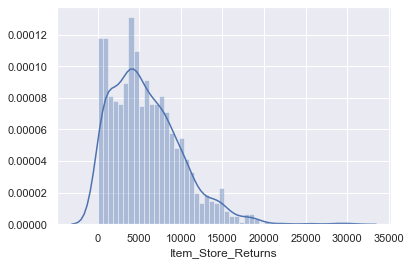

In [82]:
sns.distplot(y_test, bins=50)

In [120]:
# Using Random Forest

frt = RandomForestRegressor(max_features=35, min_samples_split=50, n_estimators=300)

frt.fit(X_train, y_train)

preds = frt.predict(X_test)

In [121]:
print('RMSE', np.sqrt(mean_squared_error(y_test, preds)))

RMSE 2913.6020052826084


In [132]:
# using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
new = GradientBoostingRegressor(criterion='mse', tol=-np.infty)

param_dist = [
    {
        'loss': ['ls', 'lad', 'huber', 'quantile'],
        'n_estimators': randint(low=100, high =300),
        'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1]
    }
]

rand = RandomizedSearchCV(new, scoring='neg_mean_squared_error', param_distributions=param_dist, verbose=50)

In [133]:
rand.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249 
[CV]  alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249, score=-55182035.412, total=   2.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[CV] alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249 
[CV]  alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249, score=-57520317.572, total=   3.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s
[CV] alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249 
[CV]  alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249, score=-59397153.708, total=   2.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s remaining:    0.0s
[CV] alpha=0.001, learning_rate=1e-05, loss=quantile, n_estimators=249 
[CV]  

[CV]  alpha=0.1, learning_rate=0.01, loss=huber, n_estimators=160, score=-10919989.324, total=   2.1s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:  1.3min remaining:    0.0s
[CV] alpha=0.1, learning_rate=0.01, loss=huber, n_estimators=160 .....
[CV]  alpha=0.1, learning_rate=0.01, loss=huber, n_estimators=160, score=-10304068.686, total=   2.1s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.3min remaining:    0.0s
[CV] alpha=0.1, learning_rate=0.01, loss=huber, n_estimators=160 .....
[CV]  alpha=0.1, learning_rate=0.01, loss=huber, n_estimators=160, score=-8047896.744, total=   2.1s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min remaining:    0.0s
[CV] alpha=0.1, learning_rate=0.001, loss=ls, n_estimators=187 .......
[CV]  alpha=0.1, learning_rate=0.001, loss=ls, n_estimators=187, score=-15936444.897, total=   1.8s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.4min remaining:    0.0s
[CV] alpha=0.1, learning_rate=0.001, loss=ls, n_estimators=187

RandomizedSearchCV(estimator=GradientBoostingRegressor(criterion='mse',
                                                       tol=-inf),
                   param_distributions=[{'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                   0.1],
                                         'learning_rate': [1e-05, 0.0001, 0.001,
                                                           0.01, 0.1],
                                         'loss': ['ls', 'lad', 'huber',
                                                  'quantile'],
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000250889D38C8>}],
                   scoring='neg_mean_squared_error', verbose=50)

In [134]:
rand.best_score_

-9111182.611940833

In [135]:
rand.best_params_

{'alpha': 1e-05, 'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 288}

In [238]:
check = GradientBoostingRegressor(alpha = 1e-05, learning_rate= 0.008, loss= 'ls', n_estimators= 500, random_state=42, tol=-np.infty)

check.fit(X_train, y_train)

predz = check.predict(X_test)

print('RMSE', np.sqrt(mean_squared_error(y_test, predz)))

RMSE 2899.8960746065068
